# Capstone 3 -> Bank Marketing Campaign

**From Rules-Based to Machine Learning: Smart Solutions for Term Deposit Campaigns.**

Muhammad Iqbal - JCDS 2704

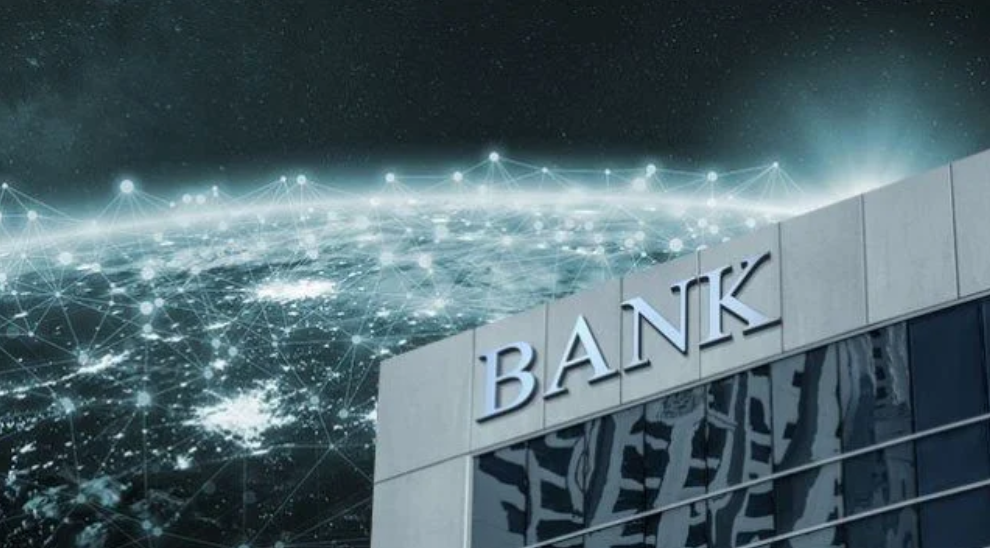

# **1. Business Understanding**

### **Pengenalan** 
Dalam industri perbankan, menarik pelanggan baru untuk berinvestasi dalam produk finansial adalah tantangan yang terus berkembang. Salah satu produk yang menjadi fokus utama adalah deposit berjangka, yaitu simpanan berjangka dengan bunga tetap yang hanya dapat dicairkan setelah periode tertentu.

Bank sering kali menggunakan kampanye pemasaran untuk meningkatkan jumlah pelanggan yang berinvestasi dalam deposit berjangka. Namun, tidak semua pelanggan yang dihubungi tertarik untuk berpartisipasi, sehingga bank perlu memahami faktor-faktor yang memengaruhi keputusan pelanggan.

#### **Rumusan masalah**
Divisi Business development Bank ingin meningkatkan efektivitas kampanye untuk mendorong lebih banyak pelanggan melakukan deposit berjangka. Pendekatan sebelumnya yang berbasis rule-based terbatas dalam mengidentifikasi pola kompleks pada data pelanggan, sehingga hasilnya kurang optimal.

Untuk meningkatkan hasil, Bank beralih ke pendekatan machine learning yang diharapkan mampu memprediksi pelanggan potensial secara lebih akurat. Dengan menargetkan audiens yang tepat, bank dapat meningkatkan tingkat konversi dan efisiensi kampanye pemasaran.
#### **Goals**:
Menggunakan dataset kampanye pemasaran sebelumnya, Bank bertujuan untuk membangun model machine learning yang mampu memprediksi pelanggan dengan peluang tertinggi melakukan deposit berjangka. Model ini akan membantu bank menargetkan kampanye dengan lebih efektif, sehingga dapat meningkatkan profitabilitas dan mengoptimalkan sumber daya pemasaran.

#### Analytical Approach
*Data prepocessing* dengan menangani data hilang, data duplikat, mengonversi variabel kategori, dan melakukan *binning*. Memilih Fitur relevan, lalu *modeling* dengan memilih model terbaik (*best model*) seperti Random Forest, Logistic Regression, Decision Tree, dan XGBoost. 

#### Metrics Evaluation
metriks yang saya gunakan adalah F1-Score, yaitu metrik evaluasi yang menghitung keseimbangan antara precision dan recall.
F1-Score dapat membantu mengevaluasi model dengan fokus pada:
- Menemukan pelanggan potensial dengan tepat (meningkatkan Precision).
- Mengidentifikasi sebanyak mungkin pelanggan potensial (meningkatkan Recall).

1. TP = pada aktualnya customer Deposit dan model benar prediksi customer deposit

2. TN = pada aktual nya customer tidak deposit dan model benar prediksi tidak deposit

3. FP = pada aktualnya customer tidak deposit dan model salah, prediksi deposit

4. FN = pada aktualnya customer deposit dan model salah, prediksi tidak deposit


- Type 1 error : FP
- Type 2 error : FN

# **2. Pemahaman Data**

## 2.1 Deskripsi Data

**Customer**

|Column Name | Description|
|----------|------------|
|Age | Usia pelanggan |
|Job |Pekerjaan pelanggan |
|Balance |Saldo atau jumlah uang yang tersimpan di rekening pelanggan |
|Housing |Status kepemilikan rumah (apakah memiliki pinjaman perumahan atau tidak) |
|Loan |Status pinjaman pribadi (apakah memiliki pinjaman lain atau tidak) |

**Marketing**

|Column Name | Description|
|----------|------------|
|Contact | Jenis komunikasi yang digunakan saat menghubungi pelanggan |
|Month |Bulan terakhir pelanggan dihubungi dalam tahun tersebut |
|Campaign |Jumlah kontak yang dilakukan selama kampanye pemasaran ini untuk pelanggan tersebut |
|Pdays |Jumlah hari sejak pelanggan terakhir kali dihubungi dalam kampanye sebelumnya |
|Poutcome |Hasil dari kampanye pemasaran sebelumnya  |
|Deposit |Label target, menunjukkan apakah pelanggan membuka deposito (Ya/Tidak) | 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

#splitting
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer, PolynomialFeatures

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce

#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif,SelectFromModel, RFE, SequentialFeatureSelector

#resampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss


#preprocessing
from sklearn.compose import ColumnTransformer

#model

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

#tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

#metric
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score ,classification_report, mean_squared_error, mean_absolute_error, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


## 2.2 Data Preparation



In [4]:
# pd.set_option('display.max_colwidth', None)
def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique Values'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique Values
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,12,"[admin., self-employed, services, housemaid, t..."
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,4,"[unknown, other, failure, success]"


In [5]:
df["deposit"] = np.where(df["deposit"]=="no",0,1)

In [6]:
df["job"] = np.where(df["job"]=="unknown",np.nan,df["job"])
df["contact"] = np.where(df["contact"]=="unknown",np.nan,df["contact"])
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,NaN,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


In [7]:
df["job"] = df["job"].str.replace(".","")
df["job"].unique()

array(['admin', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', nan], dtype=object)

`insight`

1. `Deposit` = Diubah menjadi nilai biner (0 untuk "no", 1 untuk "yes")
2. `job` = Mengganti Nilai unknown Menjadi NaN pada Kolom job
3. `contact` = Mengganti Nilai unknown Menjadi NaN pada Kolom contact



fitur poutcome dengan nilai unknown menunjukkan bahwa pelanggan belum pernah dihubungi pada kampanye sebelumnya, yang seharusnya ditandai dengan nilai -1 pada fitur pdays. Namun, pada data train ditemukan adanya kasus di mana pdays bernilai positif, tetapi poutcome tetap unknown.

Kemungkinan hal ini terjadi akibat kesalahan dalam sistem pencatatan. Oleh karena itu, saya akan memperbaiki inkonsistensi tersebut dengan mengganti nilai poutcome menjadi other, yang menandakan bahwa pelanggan telah dihubungi namun tidak memberikan respons.

In [8]:
df.duplicated().sum()

np.int64(8)

In [9]:
#Menghapus data duplikat pada data Train
df = df.drop_duplicates()

## 2.3 Distribusi & Normalitas

In [10]:
df.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
df_numerik=[ 'age', 'balance','campaign', 'pdays']

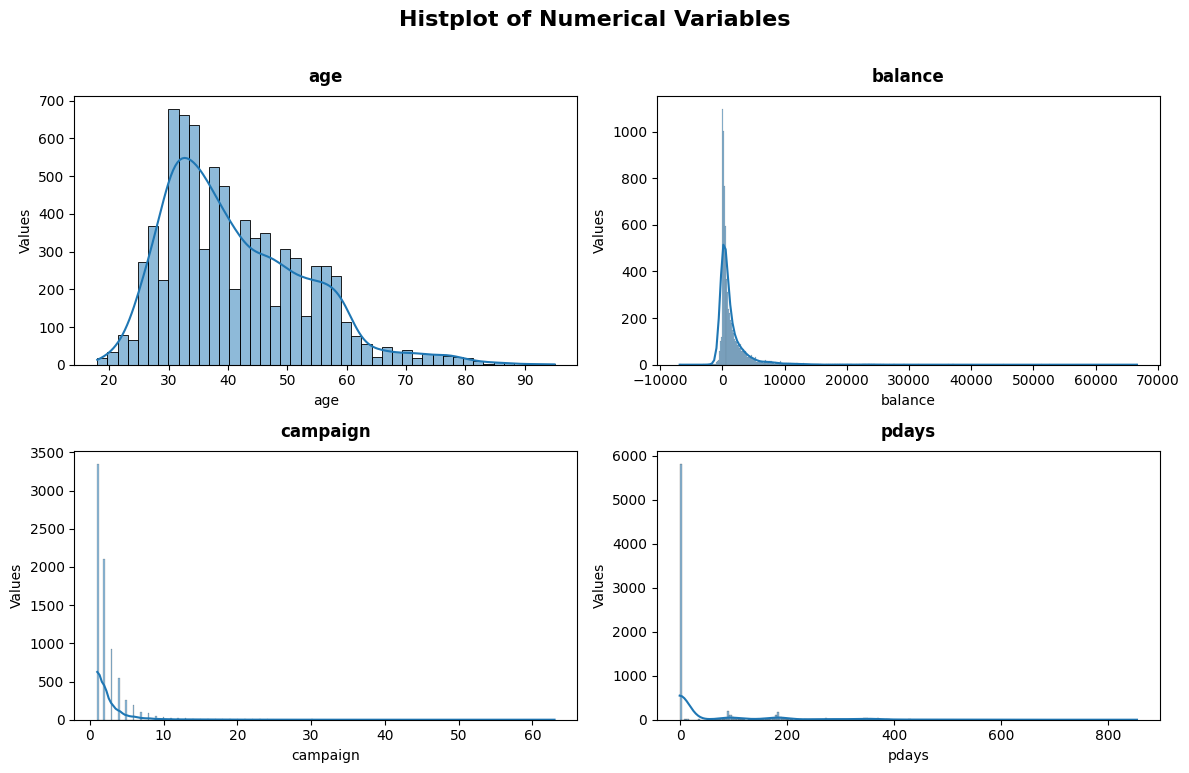

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axes = axes.flatten()

for i, col in enumerate(df_numerik):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Histplot of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [13]:
from scipy.stats import normaltest

for column in  df_numerik:
    stat,p = normaltest(df[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        print(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

Kolom 'age' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'balance' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'campaign' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'pdays' tidak terdistribusi normal (p-value: 0.0000)


- setelah dilakukan `uji Normal test` pada data numerik, diketahui bahwa semua kolom numerik tidak terdistribusi normal

## 2.4 Handling Outliers

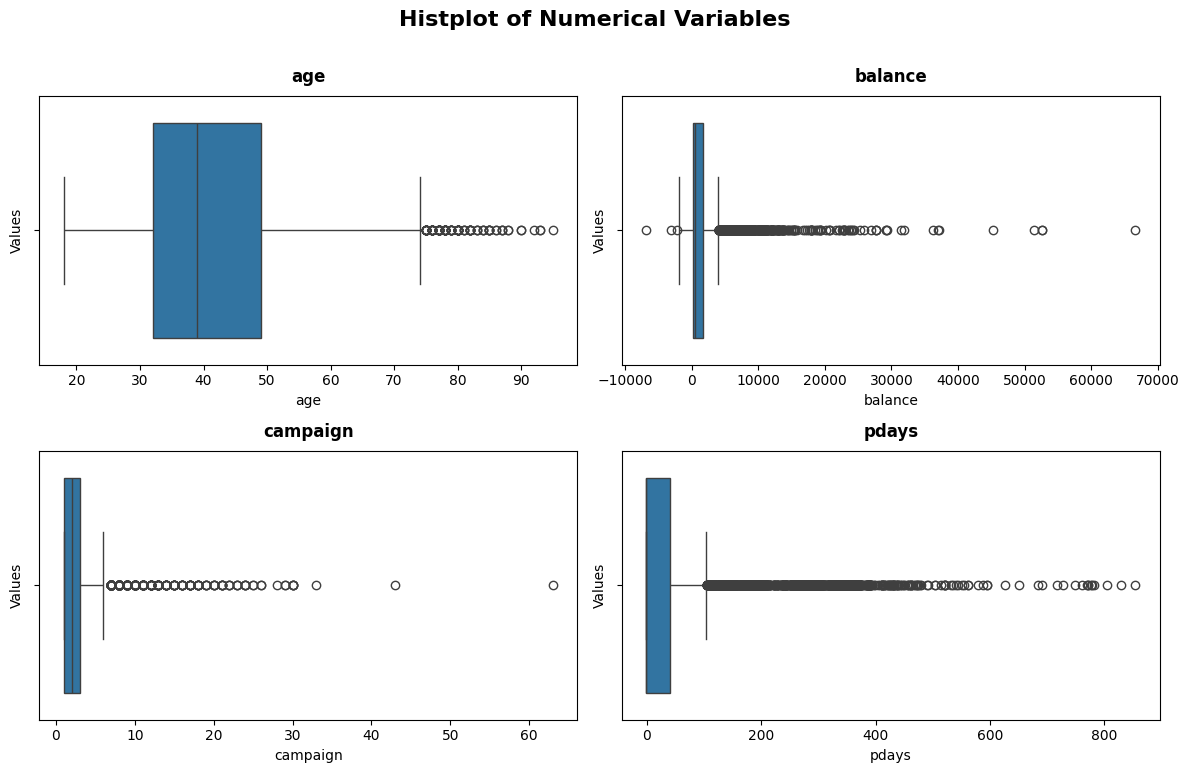

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axes = axes.flatten()

for i, col in enumerate(df_numerik):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Boxplot of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [15]:
def detect_outliers(df, columns):
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)]
        # extreme_outliers = df[(df[col] < extreme_lower_outlier) | (df[col] > extreme_upper_outlier)]
        
        outlier_info[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Whisker': lower_whisker,
            'Upper Whisker': upper_whisker,

        }

    return outlier_info

columns_to_check = ["age", "balance", "campaign", "pdays"]
outlier_results = detect_outliers(df, columns_to_check)
pd.DataFrame(outlier_results).T


,Q1,Q3,IQR,Lower Whisker,Upper Whisker,Extreme Upper Outlier,Extreme Lower Outlier
age,32.0,49.0,17.0,6.5,74.5,223.5,19.5
balance,128.0,1685.0,1557.0,-2207.5,4020.5,12061.5,-6622.5
campaign,1.0,3.0,2.0,-2.0,6.0,18.0,-6.0
pdays,-1.0,41.0,42.0,-64.0,104.0,312.0,-192.0


In [16]:
#drop all outlier pada data train
df_clean = df[df["campaign"]<40]
df_clean = df[df["balance"]<40000]

df_clean

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,NaN,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin,54,yes,no,cellular,nov,1,-1,unknown,0


# 3. Modeling

Proses modeling dilakukan untuk membangun model prediktif yang dapat memproyeksikan kemungkinan pelanggan melakukan deposit berdasarkan data yang tersedia. Model akan dilatih menggunakan data train dan diuji menggunakan data test. 

Melakukan modeling dasar tanpa penyesuaian parameter (hyperparameter tuning). Beberapa model machine learning yang digunakan antara lain:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- Gradient Boosting Classifier

Sebelum memasuki tahap modeling, dilakukan proses data preprocessing untuk mempersiapkan data agar sesuai dengan kebutuhan model. Langkah-langkah yang dilakukan adalah:

1. Membagi Data Train dan Test

    Data `train` dipisahkan menjadi X_train dan y_train, sedangkan `test` menjadi X_test dan y_test.

2. Imputasi Data Numerik dan Binning

- Kolom `age` dilakukan impute menggunakan nilai median untuk mengisi data yang hilang (NaN), lalu dilakukan binning menjadi 5 kelompok menggunakan metode KBinsDiscretizer dengan strategi uniform.
- Kolom `balance` dan `pdays` juga dilakukan impute dengan median, lalu binning menjadi 5 kelompok. Setelah itu, dilakukan scaling dengan metode RobustScaler.
- Kolom `campaign` hanya dilakukan impute median dan scaling dengan RobustScaler.

3. Encoding Data Kategorikal

- Kolom `job`, `contact`, `poutcome`, `housing`, dan `loan` dilakukan impute dengan nilai konstan other untuk mengisi nilai yang hilang, lalu dilakukan One-Hot Encoding.
- Kolom `month` dilakukan Ordinal Encoding sesuai urutan bulan (Jan–Des).

4. Pipeline dan Grid Search untuk Modeling

- Dibentuk pipeline yang mencakup seluruh proses preprocessing dan modeling.
- Dilakukan hyperparameter tuning menggunakan GridSearchCV dengan cross-validation sebanyak 5 kali (cv=5).
- Metrics evaluation model menggunakan f1 Score (scoring='f1').

5. Pengukuran Waktu Fitting Model

- Proses fitting (gscv.fit(X_train, y_train)) diukur waktunya mulai dari awal hingga selesai, kemudian dicetak hasil waktu eksekusinya (Fitting time).


In [17]:
X = df_clean.drop("deposit",axis=1)
y = df_clean["deposit"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2025)
display(X_train.shape,X_test.shape)

(6240, 10)

(1560, 10)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, RobustScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

# Definisi Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('Num 1', 
         Pipeline([
             ('Imputer 1', SimpleImputer(strategy='median')),
             ('Binning 1', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))
         ]), 
         ['age']),

        ('Num 2', 
         Pipeline([
             ('Imputer 2', SimpleImputer(strategy='median')),
             ('Binning 2', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')),
             ('Scaler 1', RobustScaler())
         ]), 
         ['balance','pdays']),
        
        ('Num 3', 
         Pipeline([
             ('Imputer 3', SimpleImputer(strategy='median')),
             ('Scaler 2', RobustScaler())
         ]), 
         ['campaign']),
        
        # Categorical Features
        ('Cat 1', 
         Pipeline([
             ('Imputer 4', SimpleImputer(strategy='constant', fill_value='other')),
             ('Encoder 1', OneHotEncoder(handle_unknown='ignore'))
         ]), 
         ['job', 'contact', 'poutcome','housing', 'loan']),

        ('Cat 2', 
         Pipeline([
             ('Encoder 2', OrdinalEncoder(categories=[[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
             ]]))
         ]), 
         ['month'])
    ], 
    remainder='passthrough'
)

# Definisikan pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', LogisticRegression(random_state=2025))  
])

# Definisikan parameter grid
param_grid = {
    'classifier': [RandomForestClassifier(random_state=2025),
                   DecisionTreeClassifier(random_state=2025),
                   LogisticRegression(random_state=2025),
                   XGBClassifier(random_state=2025)]
}

# Pastikan X_train dan y_train telah didefinisikan sebelumnya
# Ukur waktu fitting
start_time = time.time()

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, 
                    param_grid, 
                    cv=5, 
                    n_jobs=-1, 
                    scoring='f1', 
                    error_score="raise")

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)

end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 9.54 seconds


In [20]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 1',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Num 2',
                                                  Pipeline(steps=[('Imputer 2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 2',
                                                                   KBinsDiscretizer(encode='ordinal...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2025, ...))])

In [21]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.324875,0.035367,0.045636,0.003778,"XGBClassifier(base_score=None, booster=None, c...","{'classifier': XGBClassifier(base_score=None, ...",0.661871,0.649635,0.684588,0.667274,0.670909,0.666855,0.011423,1
2,0.178375,0.027561,0.038118,0.005437,LogisticRegression(random_state=2025),{'classifier': LogisticRegression(random_state...,0.636128,0.637168,0.666088,0.666667,0.643463,0.649903,0.013685,2
0,1.436397,0.062197,0.094716,0.005770,RandomForestClassifier(random_state=2025),{'classifier': RandomForestClassifier(random_s...,0.631670,0.653380,0.644366,0.635870,0.643599,0.641777,0.007506,3
1,0.131935,0.009407,0.037072,0.008001,DecisionTreeClassifier(random_state=2025),{'classifier': DecisionTreeClassifier(random_s...,0.597884,0.627313,0.616772,0.606393,0.604111,0.610494,0.010381,4


**Pemilihan Model untuk Hyperparameter Tuning**

Setelah melakukan proses modeling default dengan empat model (Random Forest Classifier, Decision Tree Classifier, Logistic Regression, dan XGBoost Classifier), dipilih tiga model dengan performa terbaik berdasarkan F1 score:

**XGBoost Classifier**

Model ini menunjukkan performa terbaik karena kemampuannya menangani dataset yang kompleks dengan teknik boosting, serta efektif dalam menangani data yang tidak seimbang (imbalanced data).

**Logistic Regression**

Model ini memiliki keunggulan interpretasi yang mudah, terutama untuk memahami pengaruh masing-masing fitur terhadap hasil prediksi. Meskipun sederhana, model ini sering menjadi baseline yang kuat.

**Random Forest Classifier**

Model ini unggul dalam menangani overfitting melalui teknik bagging dan memiliki kemampuan yang kuat pada data dengan banyak fitur. Selain itu, model ini dapat memberikan informasi tentang feature importance.

In [22]:
y_pred=gscv.best_estimator_.predict(X_test)
print('f1_score',f1_score(y_test, y_pred))

f1_score 0.6601796407185628


In [23]:
y_pred_train = best_model.predict(X_train)
print('performance train \n',classification_report(y_train,y_pred_train))

performance train 
               precision    recall  f1-score   support

           0       0.76      0.88      0.82      3258
           1       0.84      0.70      0.76      2982

    accuracy                           0.79      6240
   macro avg       0.80      0.79      0.79      6240
weighted avg       0.80      0.79      0.79      6240



In [24]:
y_pred_test = best_model.predict(X_test)
print('performance test \n',classification_report(y_test,y_pred_test))

performance test 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       815
           1       0.75      0.59      0.66       745

    accuracy                           0.71      1560
   macro avg       0.72      0.70      0.70      1560
weighted avg       0.71      0.71      0.70      1560



In [25]:
best_estimator = gscv.best_estimator_
transformer = best_estimator.named_steps['preprocessor']
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,Num 1__age,Num 2__balance,Num 2__pdays,Num 3__campaign,Cat 1__job_admin,Cat 1__job_blue-collar,Cat 1__job_entrepreneur,Cat 1__job_housemaid,Cat 1__job_management,Cat 1__job_other,...,Cat 1__contact_telephone,Cat 1__poutcome_failure,Cat 1__poutcome_other,Cat 1__poutcome_success,Cat 1__poutcome_unknown,Cat 1__housing_no,Cat 1__housing_yes,Cat 1__loan_no,Cat 1__loan_yes,Cat 2__month
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0
1,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,10.0
3,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
6236,1.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0
6237,1.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0
6238,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 3.1 Pemeriksaan Multikolinearitas

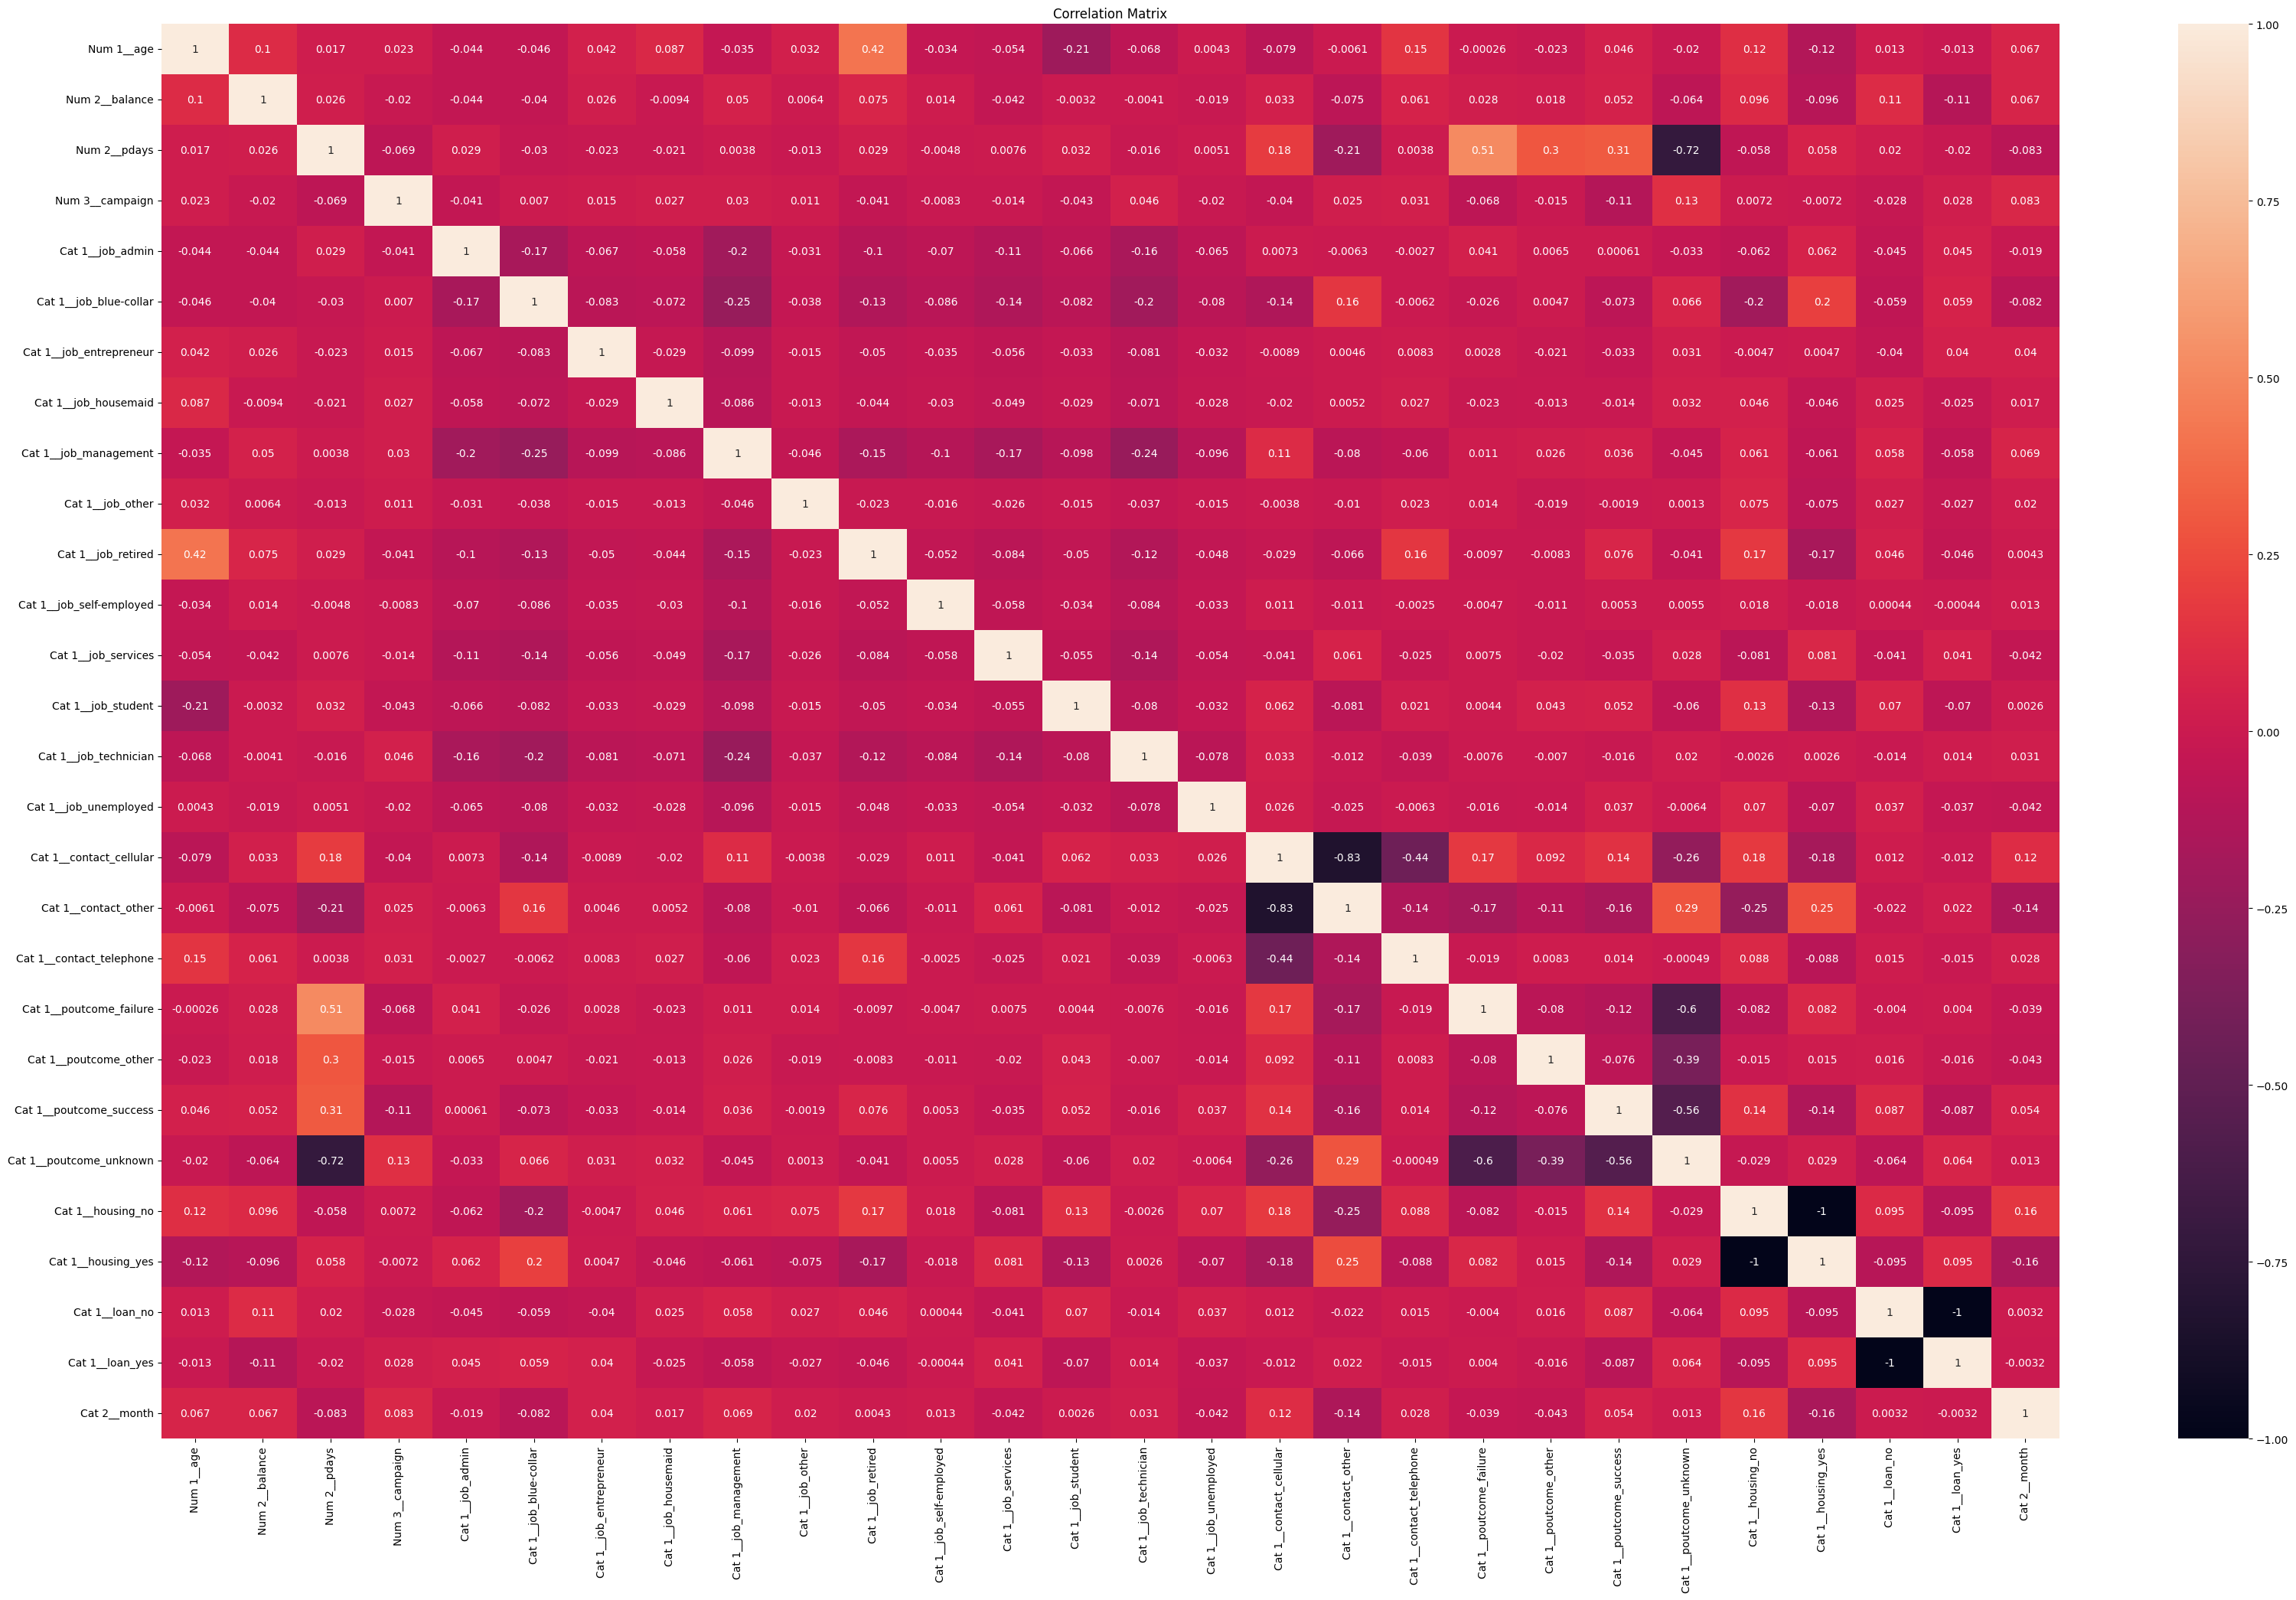

In [26]:
plt.figure(figsize=(40,24))
sns.heatmap(X_train_encoded.corr(method="spearman"),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [27]:
dfcorr=X_train_encoded.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.70 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['Num 1__age', 'Num 1__age'],
 ['Num 2__balance', 'Num 2__balance'],
 ['Num 2__pdays', 'Num 2__pdays'],
 ['Num 3__campaign', 'Num 3__campaign'],
 ['Cat 1__job_admin', 'Cat 1__job_admin'],
 ['Cat 1__job_blue-collar', 'Cat 1__job_blue-collar'],
 ['Cat 1__job_entrepreneur', 'Cat 1__job_entrepreneur'],
 ['Cat 1__job_housemaid', 'Cat 1__job_housemaid'],
 ['Cat 1__job_management', 'Cat 1__job_management'],
 ['Cat 1__job_other', 'Cat 1__job_other'],
 ['Cat 1__job_retired', 'Cat 1__job_retired'],
 ['Cat 1__job_self-employed', 'Cat 1__job_self-employed'],
 ['Cat 1__job_services', 'Cat 1__job_services'],
 ['Cat 1__job_student', 'Cat 1__job_student'],
 ['Cat 1__job_technician', 'Cat 1__job_technician'],
 ['Cat 1__job_unemployed', 'Cat 1__job_unemployed'],
 ['Cat 1__contact_cellular', 'Cat 1__contact_cellular'],
 ['Cat 1__contact_other', 'Cat 1__contact_other'],
 ['Cat 1__contact_telephone', 'Cat 1__contact_telephone'],
 ['Cat 1__poutcome_failure', 'Cat 1__poutcome_failure'],
 ['Cat 1__poutcome_o

Pemeriksaan multikolinearitas dilakukan menggunakan korelasi Spearman karena data tidak terdistribusi normal. Batas ambang yang digunakan untuk mendeteksi multikolinearitas adalah korelasi sebesar 0,70. Hasil pemeriksaan menunjukkan tidak ada fitur dengan korelasi di atas ambang tersebut. Dengan demikian, tidak ditemukan indikasi multikolinearitas, dan seluruh fitur siap digunakan untuk pemodelan.

## 3.2 Hyperparameter Tuning

Proses tuning model dilakukan menggunakan GridSearchCV dengan pipeline yang mencakup beberapa tahap utama: preprocessing, undersampling, seleksi fitur, dan pelatihan model. Berikut adalah penjelasannya:

1. **Pipeline:**

- Preprocessing: processor sama seperti model defalut.
- Random Under Sampling: Menggunakan RandomUnderSampler untuk menangani ketidakseimbangan kelas dengan mengurangi jumlah sampel mayoritas.
- Feature Selection: Menggunakan SelectKBest untuk memilih 15 fitur terbaik yang paling relevan terhadap label target.
- Classifier: Menggunakan placeholder yang kemudian akan diisi oleh model yang diuji saat grid search.

2. **Model yang Diuji:**

    Tiga algoritma diuji dalam GridSearchCV, masing-masing dengan hyperparameter yang bervariasi:

3. **Evaluasi Model:**

- Menggunakan metrik F1-score.
- Cross-validation dilakukan sebanyak 5 kali lipat (cv=5) untuk memastikan hasil yang stabil.
- Parallel processing (n_jobs=-1) digunakan untuk mempercepat proses pencarian parameter terbaik.
- Jika terjadi kesalahan selama training data, proses akan berhenti (error_score="raise").

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler  # Menggunakan Random Under Sampling

# Define pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocessing step
    ("undersampling", RandomUnderSampler(random_state=2025)),  # Random Under Sampling
    ("feature_selection", SelectKBest(score_func=f_classif, k=15)),  # Feature selection
    ('classifier', LogisticRegression(random_state=2025))  # Placeholder
])

# Define parameter grids
param_grid = [
    {
        'classifier': [LogisticRegression(random_state=2025, max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__class_weight': ['balanced']
    },
    {
        'classifier': [RandomForestClassifier(random_state=2025)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__class_weight': ['balanced']
    },
    {
        'classifier': [XGBClassifier(random_state=2025, use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
]

# Define F1 scorer
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer, error_score="raise")

# Fit the model
start_time = time.time()
gscv.fit(X_train, y_train)
end_time = time.time()

print(f"Fitting time: {end_time - start_time:.2f} seconds")


Fitting time: 60.61 seconds


In [29]:
display("Best parameters:", gscv.best_params_)
display("Best F1 score:", gscv.best_score_)

'Best parameters:'

{'classifier': LogisticRegression(max_iter=1000, random_state=2025),
 'classifier__C': 0.1,
 'classifier__class_weight': 'balanced',
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

'Best F1 score:'

np.float64(0.6624865239060833)

In [30]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 1',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Num 2',
                                                  Pipeline(steps=[('Imputer 2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 2',
                                                                   KBinsDiscretizer(encode='ordinal...
                                                  Pipeline(steps=[('Encoder 2',
                                                                   OrdinalEncoder(categories=[['jan',
                                                                                               'feb',
                                                                                               'mar',
                                                                                               'apr',
                                                                                               'may',
                                                                                               'jun',
                                                                                               'jul',
                                                                                               'aug',
                                                                                               'sep',
                                                                                               'oct',
                                                                                               'nov',
                                                                                               'dec']]))]),
                                                  ['month'])])),
                ('undersampling', RandomUnderSampler(random_state=2025)),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=2025,
                                    solver='liblinear'))])

In [31]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,...,param_classifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.235951,0.064080,0.083282,0.024883,"LogisticRegression(max_iter=1000, random_state...",0.10,balanced,l2,liblinear,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,0.656934,0.646531,0.679339,0.670501,0.659128,0.662487,0.011357,1
2,0.190226,0.036459,0.053045,0.006682,"LogisticRegression(max_iter=1000, random_state...",0.10,balanced,l1,liblinear,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,0.653595,0.647351,0.676617,0.669975,0.658023,0.661112,0.010718,2
1,0.443317,0.168896,0.067720,0.019845,"LogisticRegression(max_iter=1000, random_state...",0.01,balanced,l2,liblinear,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,0.660225,0.643958,0.674249,0.667216,0.657622,0.660654,0.010159,3
5,0.175744,0.022333,0.050418,0.004201,"LogisticRegression(max_iter=1000, random_state...",1.00,balanced,l2,liblinear,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,0.652424,0.647699,0.677284,0.668325,0.655229,0.660192,0.010948,4
4,0.328706,0.076136,0.076881,0.025812,"LogisticRegression(max_iter=1000, random_state...",1.00,balanced,l1,liblinear,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,0.651316,0.648287,0.678421,0.668325,0.653498,0.659970,0.011520,5


In [32]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

In [33]:
# y_pred_test = best_model.predict(X_test)
print('performance test \n',classification_report(y_test,y_pred_test))

performance test 
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       815
           1       0.65      0.66      0.66       745

    accuracy                           0.67      1560
   macro avg       0.67      0.67      0.67      1560
weighted avg       0.67      0.67      0.67      1560



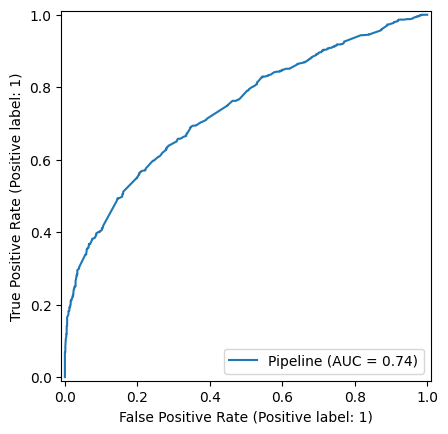

In [34]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

Nilai AUC (Area Under the Curve) sebesar 0.74 menunjukkan kemampuan model membedakan kelas positif dan negatif. Dengan AUC sebesar 0.74, model memiliki performa yang cukup baik, namun masih ada ruang untuk peningkatan, seperti melakukan threshold adjustment

## 3.3 Cara Kerja Model Logistic Regression


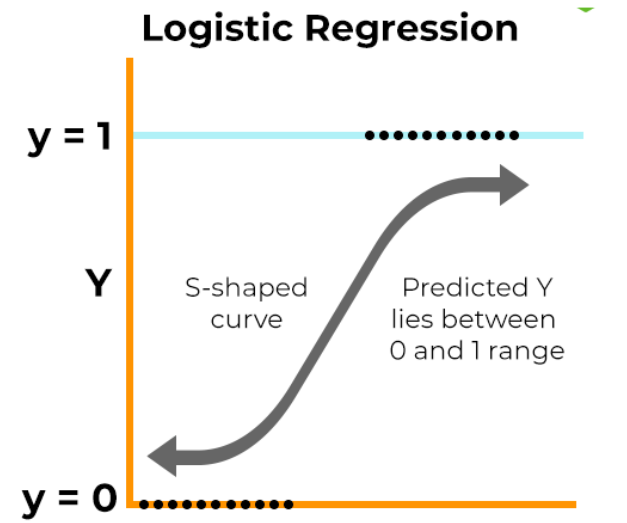

cara kerja Logistic Regression terdiri dari 3 tahap utama:
1. **Linear Combination:**
Logistic Regression menghitung nilai log-odds menggunakan persamaan linier yang menggabungkan fitur dengan bobot tertentu. Tahap ini menentukan pengaruh setiap fitur terhadap hasil prediksi.

2. **Sigmoid Function:**
Nilai log-odds kemudian diubah menjadi probabilitas menggunakan fungsi sigmoid, yang memetakan hasil ke rentang 0 hingga 1.

3. **Classification:**
Probabilitas yang dihasilkan digunakan untuk menentukan kelas. Jika probabilitas ≥ 0.5, prediksi adalah kelas positif (1), jika < 0.5, kelas negatif (0).

## 3.4 Modeling (Threshold Adjustment)

Tuning dengan Threshold adalah proses mengatur nilai ambang batas (threshold) untuk menentukan klasifikasi berdasarkan probabilitas hasil prediksi model. Secara default, threshold biasanya 0.5, namun nilai ini dapat disesuaikan sesuai kebutuhan bisnis. Tuning threshold penting saat kita ingin memaksimalkan metrik tertentu seperti Recall, Precision, atau F1-Score, terutama ketika keseimbangan antara False Positive (FP) dan False Negative (FN) sangat krusial.


In [35]:
model=best_model
model.fit(X_train,y_train)

threshold_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in threshold_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

threshold_f1 = pd.DataFrame({
    'threshold_value':threshold_value,
    "f1_score":score_list
})

threshold_f1=threshold_f1.sort_values("f1_score",ascending=False)

In [36]:
threshold_f1

,th_value,f1_score
39,0.40,0.681367
38,0.39,0.680197
37,0.38,0.680043
36,0.37,0.677437
40,0.41,0.677165
...,...,...
93,0.94,0.039474
94,0.95,0.018617
95,0.96,0.000000
96,0.97,0.000000


In [37]:
threshold_f1.head(1)["threshold_value"].values

array([0.4])

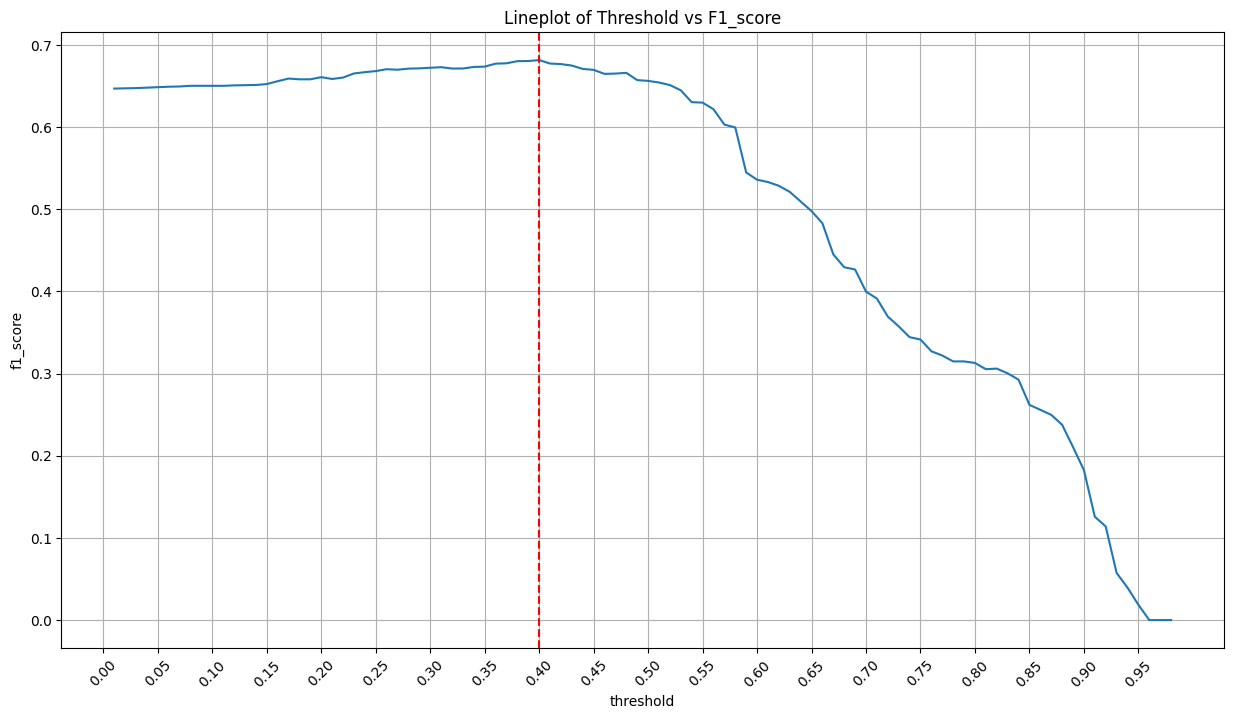

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(x=threshold_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f1_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F1 score")
plt.axvline(x=threshold_f1.head(1)["threshold_value"].values, linestyle='--',color='red')
plt.show()

In [39]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>.40,1,0)
threshold_f1[threshold_f1['threshold_value']==.40]

,th_value,f1_score
39,0.4,0.681367


In [40]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
1368,0,0
1040,1,1
1506,0,0
852,1,1
5383,0,0
...,...,...
7659,1,1
1284,1,1
2570,1,1
6635,1,1


In [41]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,1,451
1,0,0,364
2,1,1,618
3,1,0,127


In [42]:
print(classification_report(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.45      0.56       815
           1       0.58      0.83      0.68       745

    accuracy                           0.63      1560
   macro avg       0.66      0.64      0.62      1560
weighted avg       0.66      0.63      0.62      1560

f1_score 0.681367144432194


Pada tahap penyesuaian threshold, performa model menunjukkan hasil terbaik pada threshold sebesar 40%. Artinya, jika probabilitas prediksi melebihi 40%, model akan mengklasifikasikan pelanggan sebagai calon yang berpotensi melakukan deposito.

Setelah dilakukan penyesuaian fitur, hyperparameter tuning, dan pengaturan threshold, model mencapai nilai F1-score sebesar 0.68. Nilai ini mencerminkan keseimbangan yang baik antara precision dan recall, yang menunjukkan bahwa model mampu memprediksi kelas positif (pelanggan yang melakukan deposito) dengan akurasi sekitar 68%, sekaligus meminimalkan jumlah false negatives.

Selain itu, model memperoleh nilai recall sebesar 0.83, yang berarti model mampu mengidentifikasi sekitar 83% dari seluruh pelanggan yang benar-benar melakukan deposito. Sisanya, sebesar 17%, secara keliru diklasifikasikan sebagai negatif (false negatives).

## 3.5 Feature Importance

In [44]:
final_estimator = best_estimator.named_steps['classifier']

In [45]:
selected_features = best_estimator.named_steps['feature_selection'].get_support(indices=True)
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

In [46]:
test = feature_names[selected_features]

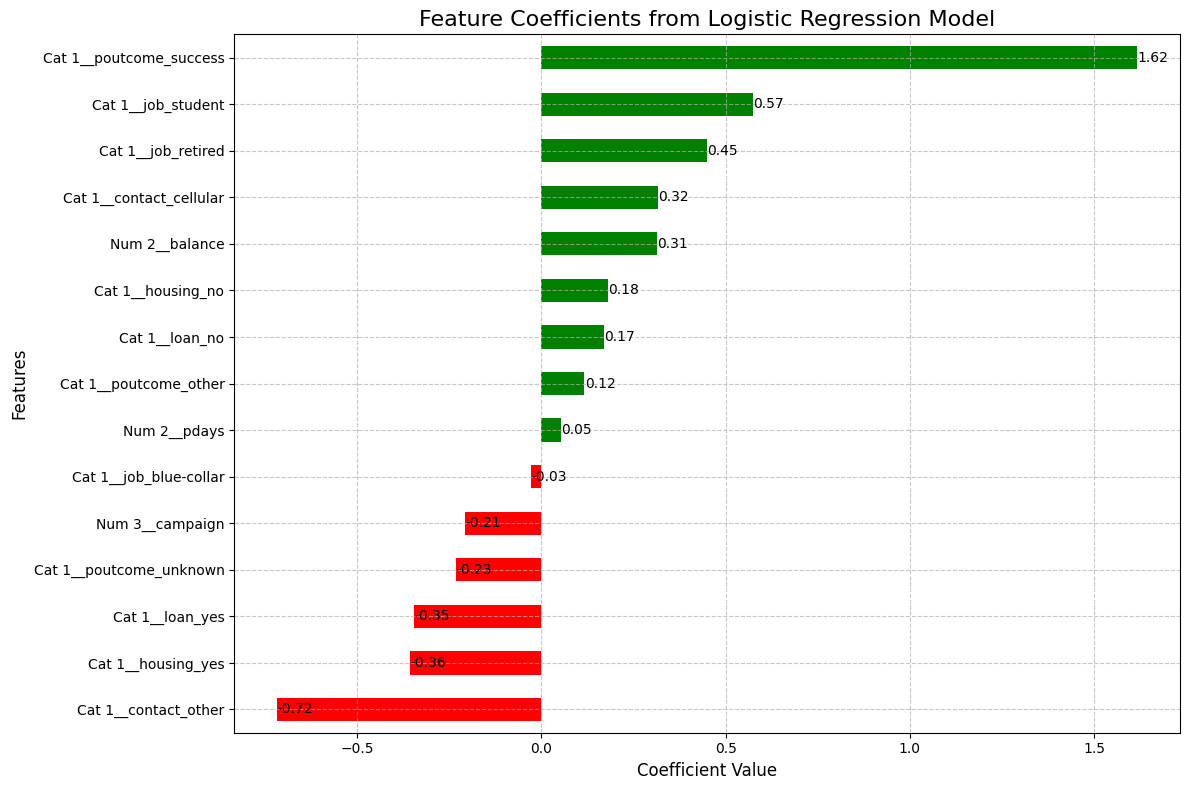

In [47]:
model_coef = pd.Series(final_estimator.coef_[0], index=test).sort_values()
model_coef

# Plot the coefficients (which represent feature importance for logistic regression)
plt.figure(figsize=(10, 6))

# Bar plot dengan pewarnaan berbeda untuk koefisien positif dan negatif
colors = ['red' if val < 0 else 'green' for val in model_coef]

ax = model_coef.plot(kind='barh', color=colors, title='Feature Coefficients (Logistic Regression)', figsize=(12, 8))

# Menambahkan grid untuk memudahkan pembacaan
ax.grid(True, linestyle='--', alpha=0.7)

# Mengatur label agar lebih mudah dibaca
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Memutar label fitur di sumbu Y untuk keterbacaan yang lebih baik
plt.yticks(rotation=0)

# Menambahkan anotasi ke setiap bar dengan nilai koefisien
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # posisi x (di akhir bar)
            i.get_y() + i.get_height() / 2,  # posisi y (tengah bar)
            f'{i.get_width():.2f}',  # teks yang ditampilkan (nilai koefisien)
            ha='left',  # perataan horizontal (perata kiri)
            va='center',  # perataan vertikal (perata tengah)
            fontsize=10)  # ukuran font

# Menampilkan plot
plt.title('Feature Coefficients from Logistic Regression Model', fontsize=16)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.show()

koefisien fitur dari model Logistic Regression yang digunakan untuk memprediksi kemungkinan pelanggan melakukan deposit. Koefisien positif menunjukkan fitur yang meningkatkan peluang deposit, sementara koefisien negatif menurunkan peluang tersebut.

**Insight Utama:**
1. Fitur yang Paling Mendorong Deposit:

- Poutcome_success (+1.62): Jika hasil kampanye sebelumnya sukses, peluang deposit meningkat signifikan.
- Job_student (+0.57) dan Job_retired (+0.45): Mahasiswa dan pensiunan lebih cenderung melakukan deposit.
- Contact_cellular (+0.32): Kontak melalui ponsel lebih efektif dibandingkan metode lainnya.
- Balance (+0.31): Nasabah dengan saldo lebih tinggi cenderung melakukan deposit.
- Housing (+0.18) : Nasabah yang tidak punya pinjaman rumah cenderung melakukan deposit.
- Loan (+0.17) : Nasabah yang tidak punya pinjaman dana (utang) cenderung melakukan deposit.

2. Fitur yang Menurunkan Peluang Deposit:

- Contact_other (-0.72): Metode kontak selain ponsel kurang efektif.
- Housing_yes (-0.36) dan Loan_yes (-0.35): Nasabah dengan kredit rumah atau pinjaman aktif cenderung enggan menambah komitmen finansial.
- Poutcome_unknown (-0.23): Jika hasil kampanye sebelumnya tidak diketahui, peluang deposit lebih kecil.

In [48]:
train = X_train.join(y_train).sort_index()
train

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
6,37,admin,4803,no,no,cellular,jan,2,-1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,NaN,179,no,no,cellular,aug,8,-1,unknown,0


In [49]:
test = X_test.join(y_test).sort_index()
test

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1
5,41,admin,-76,yes,no,cellular,apr,1,-1,unknown,0
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
21,57,management,4929,yes,no,telephone,jul,4,-1,unknown,0
23,35,management,0,yes,no,cellular,nov,2,96,success,1
...,...,...,...,...,...,...,...,...,...,...,...
7788,71,retired,2988,no,no,telephone,apr,1,-1,unknown,1
7797,26,blue-collar,78,no,no,telephone,jan,1,-1,unknown,0
7802,63,retired,12067,no,no,telephone,apr,1,191,failure,1
7803,34,blue-collar,79,no,yes,cellular,nov,1,-1,unknown,0


## 3.6 Rule Based vs Model Based

**Rule-Based Model untuk Prediksi Deposit Pelanggan**  

Rule-Based Model adalah pendekatan dalam pengambilan keputusan yang memanfaatkan aturan logis untuk memprediksi atau mengklasifikasikan data. Pada kasus ini, model menentukan skor untuk setiap pelanggan berdasarkan distribusi historis perilaku pelanggan terhadap masing-masing fitur.  

Proses perhitungan skor dilakukan dengan menghitung proporsi pelanggan yang melakukan deposit pada setiap nilai fitur. Setiap fitur memberikan kontribusi skor yang kemudian dijumlahkan menjadi *total score*. Nilai *total score* tersebut mencerminkan kecenderungan pelanggan untuk melakukan deposit berdasarkan pola historis.  

Sebagai metode klasifikasi, model menggunakan median *total score* pada data *train* sebagai ambang batas (*threshold*). Jika *total score* pelanggan melebihi nilai median tersebut, pelanggan diprediksi akan melakukan deposit (`1`), sedangkan jika berada di bawah median, pelanggan diprediksi tidak melakukan deposit (`0`).  

Pendekatan ini bersifat transparan, mudah diinterpretasikan, dan memungkinkan identifikasi fitur yang paling berpengaruh terhadap keputusan pelanggan untuk melakukan deposit.

## 3.6.1 Confusion Matrix Rule Based

In [52]:
import pandas as pd
import numpy as np

# Hitung proporsi deposit untuk setiap nilai fitur
feature_columns = ['age','job','balance', 'housing', 'loan', 'contact', 'month','campaign','pdays', 'poutcome']
feature_scores = {}

for feature in feature_columns:
    prop = train.groupby(feature)['deposit'].value_counts(normalize=True).unstack().fillna(0)
    feature_scores[feature] = prop.get(1, pd.Series())  # '1' untuk deposit

# Fungsi untuk menghitung skor per pelanggan
def hitung_skor(row):
    return sum(feature_scores[feature].get(row[feature], 0) for feature in feature_columns)

# Tambahkan kolom skor pada train dan test
train['total_score'] = train.apply(hitung_skor, axis=1)
test['total_score'] = test.apply(hitung_skor, axis=1)

# Hitung median total skor pada train
median_score = train['total_score'].median()
print(f'Rata-rata total skor pada data train: {median_score}')

# Prediksi data test berdasarkan rata-rata skor
test['pred'] = np.where(test['total_score'] <= median_score, 0, 1)

# Lihat hasil prediksi
display(test[['total_score', 'pred']].head())


Rata-rata total skor pada data train: 4.619849152367049


,total_score,pred
0,4.250130,0
5,4.244493,0
7,3.494898,0
21,3.990316,0
23,5.427092,1


In [53]:
f1_score(test["deposit"],test["pred"])

np.float64(0.6335493160547156)

In [54]:
confussion_matrix_rulebased=pd.DataFrame({
    'actual': test["deposit"],
    'pred': test["pred"]
}).value_counts().reset_index()

confussion_matrix_rulebased

,actual,pred,count
0,0,0,611
1,1,1,440
2,1,0,305
3,0,1,204


Meskipun model Rule-Based menunjukkan nilai F1-score yang lebih rendah dibandingkan dengan model Logistic Regression, evaluasi lebih lanjut diperlukan untuk memahami performa keduanya dari perspektif business outcome.

## 3.6.2 confusion matrix model based

In [55]:
final_model = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model 

,actual,pred
1368,0,0
1040,1,1
1506,0,0
852,1,1
5383,0,0
...,...,...
7659,1,1
1284,1,1
2570,1,1
6635,1,1


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.45      0.56       815
           1       0.58      0.83      0.68       745

    accuracy                           0.63      1560
   macro avg       0.66      0.64      0.62      1560
weighted avg       0.66      0.63      0.62      1560



In [57]:
confusion_matrix_ML= final_model.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_ML

,actual,pred,count
0,0,1,451
1,0,0,364
2,1,1,618
3,1,0,127


In [58]:
print("Logistic regression:")
print(classification_report(y_test,y_pred))
display(confusion_matrix_ML.sort_values(by=["actual","pred"],ascending=[False,False]))
print("\n\nRule Based:")
print(classification_report(test["deposit"],test["pred"]))
display(confussion_matrix_rulebased.sort_values(by=["actual","pred"],ascending=[False,False]))

Logistic regression:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       815
           1       0.58      0.83      0.68       745

    accuracy                           0.63      1560
   macro avg       0.66      0.64      0.62      1560
weighted avg       0.66      0.63      0.62      1560



,actual,pred,count
2,1,1,618
3,1,0,127
0,0,1,451
1,0,0,364




Rule Based:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       815
           1       0.68      0.59      0.63       745

    accuracy                           0.67      1560
   macro avg       0.68      0.67      0.67      1560
weighted avg       0.67      0.67      0.67      1560



,actual,pred,count
1,1,1,440
2,1,0,305
3,0,1,204
0,0,0,611


In [59]:
## Logreg
TP = 618
FN = 127
FP = 451
TN = 364

## Rule based
TP = 440
FN = 305
FP = 204
TN = 611

1. **Peluang Pemasukan Dana Deposito**

Model Klasifikasi Logistic Regression terbukti lebih efektif dalam mengidentifikasi calon nasabah potensial yang akan melakukan deposito dibandingkan dengan pendekatan berbasis aturan (*Rule-Based*). Keunggulan ini terlihat dari perbandingan nilai True Positive pada Confusion Matrix.

Dengan asumsi nilai minimal penempatan awal deposito sebesar Rp10.000.000, penerapan Model Logistic Regression memungkinkan bank menghimpun dana sebesar Rp6.180.000.000, jauh lebih tinggi dibandingkan Rp4.440.000.000 yang diperoleh melalui metode *Rule-Based*. (**peningkatan sebesar 39% dengan Model Klasifikasi Logistic Regression**).<br>

**Logistic Regression Classification:**

Rp10.000.000 x 618 = **Rp6.180.000.000**

**Rule Based:**

Rp10.000.000 x 440 = **Rp4.440.000.000**
<br>
<br>
<br>

2. **Peluang Opportunity Cost**

Model Klasifikasi Logistic Regression memiliki kemampuan yang lebih baik dalam mengatasi Type 2 Error, yaitu dengan menekan risiko kesalahan dalam memprediksi calon pelanggan yang dianggap tidak akan melakukan deposito, padahal sebenarnya mereka berminat untuk melakukan deposito. Keunggulan ini terlihat dari perbandingan nilai False Negative pada Confusion Matrix serta nilai recall yang lebih tinggi pada Model Logistic Regression, yaitu sebesar 83%.

Dengan asumsi minimal penempatan awal deposito sebesar Rp10.000.000, penerapan Model Logistic Regression berpotensi menekan kerugian akibat kehilangan peluang dana hingga Rp1.270.000.000. Angka ini jauh lebih rendah dibandingkan dengan metode Rule-Based, yang berisiko menyebabkan kehilangan dana hingga Rp3.050.000.000. (**penurunan sebesar 58% dengan Model Klasifikasi Logistic Regression**).

**Logistic Regression Classification:**

Rp10.000.000 x 127 = **Rp1.270.000.000** 

**Rule Based:**

Rp10.000.000 x 305 = **Rp3.050.000.000**
<br>
<br>
<br>
<br>
<br>
3.  **Peluang Biaya Sia-Sia**

Model Rule-Based memiliki keunggulan dalam mengatasi Type 1 Error, yaitu dengan menekan risiko kesalahan dalam memprediksi calon pelanggan yang diperkirakan akan melakukan deposito, padahal sebenarnya mereka tidak berminat. Keunggulan ini terlihat dari perbandingan nilai False Positive pada Confusion Matrix serta nilai precision yang lebih tinggi pada Model Rule-Based, yaitu sebesar 72%.

Dengan asumsi biaya pemasaran sebesar 1% dari nilai minimal penempatan awal deposito (Rp10.000.000 × 1% = Rp100.000), penerapan Model Logistic Regression berpotensi menyebabkan pengeluaran biaya pemasaran hingga Rp45.100.000. Sebagai perbandingan, metode Rule-Based hanya memerlukan biaya sebesar Rp20.400.000. (**penurunan sebesar 54% dengan Model Rule Based**)

**Logistic Regression Classification:**

Rp100.000 x 451 = **Rp45.100.000** 

**Rule Based:**

Rp100.000 x 204 = **Rp20.400.000**
<br>
<br>
<br>
<br>
<br>
4. **Peluang Keuntungan Kotor**

Berdasarkan ketiga perhitungan sebelumnya, estimasi keuntungan kotor dari implementasi kedua model diperoleh dengan mengurangkan potensi pendapatan deposito terhadap biaya opportunity cost dan biaya pemasaran yang tidak efektif. Hasil analisis menunjukkan bahwa Model Klasifikasi Logistic Regression memiliki potensi keuntungan kotor sebesar Rp4.864.900.000, jauh lebih tinggi dibandingkan dengan Model Rule-Based yang hanya mencapai Rp1.369.600.000.(**Model Klasifikasi Logistic Regression 255% lebih tinggi**)

**Logistic Regression Classification:**

Peluang pemasukan dana deposito: Rp6.180.000.000

Peluang kehilangan dana (opportunity cost): Rp1.270.000.000

Peluang biaya pemasaran yang sia-sia: Rp45.100.000

Keuntungan kotor = Rp6.180.000.000 - Rp1.270.000.000 - Rp45.100.000 = 
**Rp4.864.900.000**

**Rule Based:**

Peluang pemasukan dana deposito: Rp4.440.000.000

Peluang kehilangan dana (opportunity cost): Rp3.050.000.000

Peluang biaya pemasaran yang sia-sia: Rp20.400.000

Keuntungan kotor = Rp4.440.000.000 - Rp3.050.000.000 - Rp20.400.000 = 
**Rp1.369.600.000**
<br>
<br>
<br>
<br>
<br>
5. **Kesimpulan Akhir**

Perbandingan antara Model Klasifikasi Logistic Regression dan Model Rule-Based menunjukkan keunggulan yang berbeda dalam performa prediksi. Logistic Regression terbukti lebih efektif dalam meningkatkan akurasi prediksi True Positive sekaligus secara signifikan menekan potensi terjadinya False Negative. Sebaliknya, Model Rule-Based memiliki keunggulan dalam mengidentifikasi True Negative serta mengurangi risiko munculnya False Positive.

Dampak perbedaan performa tersebut terhadap profitabilitas bank sangat signifikan. Implementasi Model Logistic Regression mampu meningkatkan potensi keuntungan kotor hingga 255% dibandingkan dengan pendekatan Rule-Based. Berdasarkan hasil analisis ini, Model Klasifikasi Logistic Regression lebih direkomendasikan untuk diterapkan sebagai strategi utama dalam meningkatkan kinerja bisnis perbankan.

## 3.7 Model Constraint
Model berbasis (model-based) secara signifikan meningkatkan kinerja bisnis. Akan tetapi, perlu diingat bahwa model ini, sebagai hasil pelatihan data train, hanya optimal dalam rentang data yang spesifik. Batasan data berikut ini menguraikan kondisi input yang sesuai untuk menghasilkan prediksi yang valid:

| **Kriteria** | **Rentang Nilai**              | **Nilai yang Diperbolehkan**                                      |
|--------------|---------------------------------|-------------------------------------------------------------------|
| **Usia**     | 18 – 95                        | -                                                               |
| **Balance**  | -6847 – 36935                  | -                                                               |
| **Campaign** | 1 – 63                         | -                                                               |
| **Pdays**    | -1 – 854                      | -                                                               |
| **Job**      | -                              | admin, self-employed, services, housemaid, management, student, technician, blue-collar, entrepreneur, retired, unemployed |
| **Housing**  | -                              | yes, no                                                        |
| **Loan**     | -                              | yes, no                                                        |
| **Contact**  | -                              | cellular, telephone                                             |
| **Month**    | -                              | jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec     |
| **Poutcome** | -                              | unknown, other, success, failure                               |


In [ ]:
train.describe()

,age,balance,campaign,pdays,deposit,total_score
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,41.289904,1488.141827,2.527083,51.655769,0.477885,4.730609
std,11.961059,2799.912637,2.716486,108.178240,0.499551,0.824980
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000,2.862623
25%,32.000000,128.000000,1.000000,-1.000000,0.000000,4.117018
50%,39.000000,540.500000,2.000000,-1.000000,0.000000,4.619849
75%,49.000000,1693.000000,3.000000,52.000000,1.000000,5.273935
max,95.000000,36935.000000,63.000000,854.000000,1.000000,7.425651


In [ ]:
train.describe()

pd.set_option('display.max_colwidth', None)


columns = train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,job,"[self-employed, admin, services, housemaid, management, student, technician, blue-collar, entrepreneur, retired, unemployed, nan]",11
1,housing,"[yes, no]",2
2,loan,"[yes, no]",2
3,contact,"[cellular, telephone, nan]",2
4,month,"[apr, may, nov, jan, sep, jun, feb, mar, aug, jul, oct, dec]",12
5,poutcome,"[unknown, other, success, failure]",4


# 4. Kesimpulan & Rekomendasi

Berdasarkan hasil analisis dan pemodelan, model Logistic Regression Classifier dengan hyperparameter tuning dan penyesuaian threshold terpilih sebagai model terbaik untuk memprediksi potensi deposit nasabah. Model ini menggunakan 15 fitur yang paling berpengaruh terhadap hasil prediksi, dengan nilai f1-score 0,66 dan recall 0,81, mengungguli model berbasis aturan (rule-based). Implementasi model ini memberikan dampak signifikan pada performa bisnis, dengan peningkatan pendapatan kotor dari deposit sebesar 255% dibandingkan metode rule-based, mencapai Rp4.864.900. Hal ini menunjukkan bahwa model Logistic Regression Classifier efektif dalam mengidentifikasi nasabah dengan potensi deposit tinggi, sehingga membantu tim business development dalam menentukan strategi yang lebih tepat sasaran.

## 4.1 **Rekomendasi**

**Bisnis rekomendasi**

Pemanfaatan Model Logistic Regression Classifier: Tim pengembangan bisnis disarankan untuk memanfaatkan model Logistic Regression Classifier dalam kampanye mendatang. Model ini dapat digunakan untuk memprediksi calon pelanggan yang berpotensi melakukan deposit, sehingga memungkinkan alokasi sumber daya yang lebih efisien dan efektif.

Fokus pada Fitur Korelatif: Perusahaan perlu fokus pada fitur-fitur yang memiliki korelasi kuat dengan potensi deposit nasabah. Berdasarkan analisis, beberapa fitur yang signifikan meliputi:

- Poutcome_success: Jika hasil kampanye sebelumnya sukses, peluang deposit meningkat secara signifikan.
- Job_student dan Job_retired: Mahasiswa dan pensiunan lebih cenderung melakukan deposit.
- Contact_cellular: Kontak melalui ponsel lebih efektif dibandingkan metode lainnya.
- Balance: Nasabah dengan saldo lebih tinggi cenderung melakukan deposit.
- Housing: Nasabah yang tidak memiliki pinjaman rumah cenderung melakukan deposit.
- Loan: Nasabah yang tidak memiliki pinjaman dana (utang) cenderung melakukan deposit.

Dengan memahami dan memanfaatkan fitur-fitur ini, tim pengembangan bisnis dapat merancang kampanye yang lebih tepat sasaran dan meningkatkan potensi deposit dari nasabah.

**Model Rekomendasi**

- Integrasi Fitur Tambahan: Untuk meningkatkan akurasi model prediksi, disarankan untuk mengintegrasikan berbagai fitur tambahan yang relevan dengan profil pelanggan dan riwayat kampanye pemasaran. Fitur-fitur ini dapat mencakup data demografi pelanggan, preferensi produk, riwayat pembelian, interaksi media sosial, dan lainnya. Dengan memperkaya data yang digunakan, model akan memiliki pemahaman yang lebih komprehensif tentang perilaku pelanggan, sehingga menghasilkan prediksi yang lebih akurat.

- Evaluasi Model dengan F2-score: Dalam melakukan evaluasi model, disarankan untuk menggunakan metrik F2-score. Metrik ini memberikan penekanan lebih pada recall dibandingkan precision, sehingga sangat cocok untuk meminimalkan potensi kerugian. Dengan memprioritaskan identifikasi pelanggan yang berpotensi melakukan deposit, model dapat membantu mengurangi risiko kehilangan peluang bisnis yang berharga.

- Eksplorasi Model dan Hyperparameter Tuning: Untuk menemukan kombinasi parameter yang optimal, perlu dilakukan eksplorasi terhadap berbagai jenis model machine learning. Selain itu, proses hyperparameter tuning secara komprehensif juga penting untuk memastikan model berkinerja maksimal. Hal ini melibatkan pengujian berbagai kombinasi parameter dan memilih yang menghasilkan kinerja terbaik pada data validasi.

Dengan mengikuti rekomendasi ini, perusahaan dapat membangun model prediksi yang lebih akurat dan efektif dalam mengidentifikasi potensi deposit pelanggan, sehingga mendukung pengambilan keputusan bisnis yang lebih baik.


## 4.2 Fit Final Model

In [60]:
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
6978,30,management,6432,yes,no,cellular,nov,2,119,other
741,37,technician,2442,no,no,cellular,feb,3,-1,unknown
5619,36,admin,746,yes,no,cellular,nov,3,-1,unknown
5283,51,blue-collar,0,yes,no,telephone,may,4,-1,unknown
5443,59,retired,93,no,no,NaN,may,2,-1,unknown
...,...,...,...,...,...,...,...,...,...,...
7659,27,student,39,no,no,cellular,may,1,258,other
1284,32,admin,752,yes,no,cellular,may,2,166,failure
2570,42,management,27696,no,no,cellular,aug,1,91,success
6635,43,management,11891,no,no,cellular,dec,5,242,success


In [61]:
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

6978    0
741     1
5619    0
5283    0
5443    0
       ..
7659    1
1284    1
2570    1
6635    1
4501    1
Name: deposit, Length: 7800, dtype: int64

In [63]:
best_estimator = best_model

best_estimator.fit(data_final_model_X,data_final_model_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 1',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Num 2',
                                                  Pipeline(steps=[('Imputer 2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 2',
                                                                   KBinsDiscretizer(encode='ordinal...
                                                  Pipeline(steps=[('Encoder 2',
                                                                   OrdinalEncoder(categories=[['jan',
                                                                                               'feb',
                                                                                               'mar',
                                                                                               'apr',
                                                                                               'may',
                                                                                               'jun',
                                                                                               'jul',
                                                                                               'aug',
                                                                                               'sep',
                                                                                               'oct',
                                                                                               'nov',
                                                                                               'dec']]))]),
                                                  ['month'])])),
                ('undersampling', RandomUnderSampler(random_state=2025)),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=2025,
                                    solver='liblinear'))])

In [64]:
import pickle

In [65]:
filename = 'Final Model Bank Campaign.sav'

# pickle.dump(best_estimator,open(filename,'wb'))